# **Analisis Prediktif**: Prediksi Kemungkinan Sesorang Dapat Menderita Stroke
---
##### Oleh : [Yogi Dwi Andrian](https://www.dicoding.com/users/yogidwiandrian)
##### Proyek Submission 1 - Machine Learning Terapan Dicoding

![Sumber : http://p2ptm.kemkes.go.id/artikel-sehat/germas-cegah-stroke](https://user-images.githubusercontent.com/56554261/136577353-2b702af5-b7be-4249-8e23-f6c1e38802ad.png)

# **Pendahuluan**

Pada proyek ini, topik yang dibahas ialah mengenai `kesehatan` yang di buat untuk mengklasifikasikan orang yang beresiko terkena penyakit stroke atau tidak. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding. Untuk memudahkan navigasi di halaman, silahkan gunakan menu `Table of Contents` di kiri atas halaman.

# **1. Mengimpor pustaka/modul python yang dibutuhkan**

In [ ]:
# Memasang modul terbaru yang diperlukan dalam proyek
!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install -U pywaffle

     |████████████████████████████████| 189 kB 18.6 MB/s 
     |████████████████████████████████| 23.1 MB 65.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
     |████████████████████████████████| 526 kB 25.4 MB/s 


In [ ]:
# Untuk visualisasi data
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

# Untuk pengolahan data
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Untuk pembuatan model 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Untuk evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

# **2. Menyiapkan Dataset**

## 2.1 Menyiapkan kredensial akun Kaggle

In [ ]:
# Sebelumnya unggah API kredensial dari kaggle yang bernama kaggle.json
# Membuat direktori bernama ".kaggle"
!mkdir ~/.kaggle

# Menyalin file kaggle.json ke direktori baru yaitu ".kaggle"
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 2.2 Mengunduh dan Menyiapkan Dataset

![Sampul Dataset](https://user-images.githubusercontent.com/56554261/136794877-1f9d2a27-1542-417d-9cbd-6d91072b1375.PNG)

Informasi Dataset :

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-datase)
Lisensi | Data files © Original Authors
Kategori | kesehatan, kondisi kesehatan, Kesehatan Publik
Rating Penggunaan | 10.0 (Gold)
Jenis dan Ukuran Berkas | CSV (316.97 kb)

In [ ]:
# Mengunduh dataset menggunakan Kaggle
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 20.6MB/s]


In [ ]:
# Mengekstrak berkas zip yang baru di unduh
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


# **3. Pemahaman Data** ***(Data Understanding)***

## 3.1 Memuat Data pada sebuah Dataframe menggunakan *pandas*

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## 3.2 Keterangan kolom pada dataset

In [ ]:
# Memuat informasi pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Menghapus kolom 'id'
df = df.drop('id', axis = 1)

## **Informasi Awal Mengenai Data**

1. Berkas 'healthcare-dataset-stroke-data.csv' memiliki 5110 informasi/data

2. Memiliki data numerik dan data kategori :
    - **Data Kategori** :  gender, ever_married, work_type, residence_type, smoking_status
    - **Data Numerik Biner** : hypertension,heart_disease, stroke
    - **Data Numerik Berkelanjutan** : age, avg_glucose_level, bmi

3. Terdapat data kosong pada kolom 'bmi'

In [ ]:
# Memuat deskripsi setiap kolom dataframe
round (df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
round(df.describe(exclude = ['float', 'int64']))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## **Details**

Berkas pada 'healthcare-dataset-stroke-data.csv' memiliki 12 kolom diantaranya adalah : 
1. `id`  Nomor identifikasi individu.
2. `gender` Jenis kelamin individu.
3. `hypertension` Parameter terkait kesehatan, apakah seseorang menderita hipertensi. Disimbolkan 0 jika tidak menderita hipertensi, dan 1 jika menderita hipertensi.
4. `heart_disease` Parameter terkait kesehatan, apakah seseorang memiliki penyakit jantung. Disimbolkan 0 jika tidak memiliki penyakit jantung, dan 1 jika memiliki penyakit jantung.
5. `ever_married` Informasi pribadi, apakah orang sudah menikah atau belum belum?
6. `work_type` Sifat tempat kerja.
8. `Residence_type` Tipe tempat tinggal.
9. `avg_glucose_level` Tingkat glukosa rata-rata dalam darah untuk individu.
10. `bmi` indeks massa tubuh individu
11. `smoking_status` Informasi kebiasaan merokok individu saat ini.
12. `stroke` Informasi apakah individu pernah mengalami stroke atau tidak. Disimbolkan 0 jika tidak pernah mengalami stroke, dan 1 jika individu pernah mengalami stroke.

_Catatan : "Unkown" dalam `smoking_status` berarti informasi tersebut tidak tersedia untuk pasien ini._

## 3.3 Visualisasi Data

#### 3.3.1 Visualisasi data yang kosong

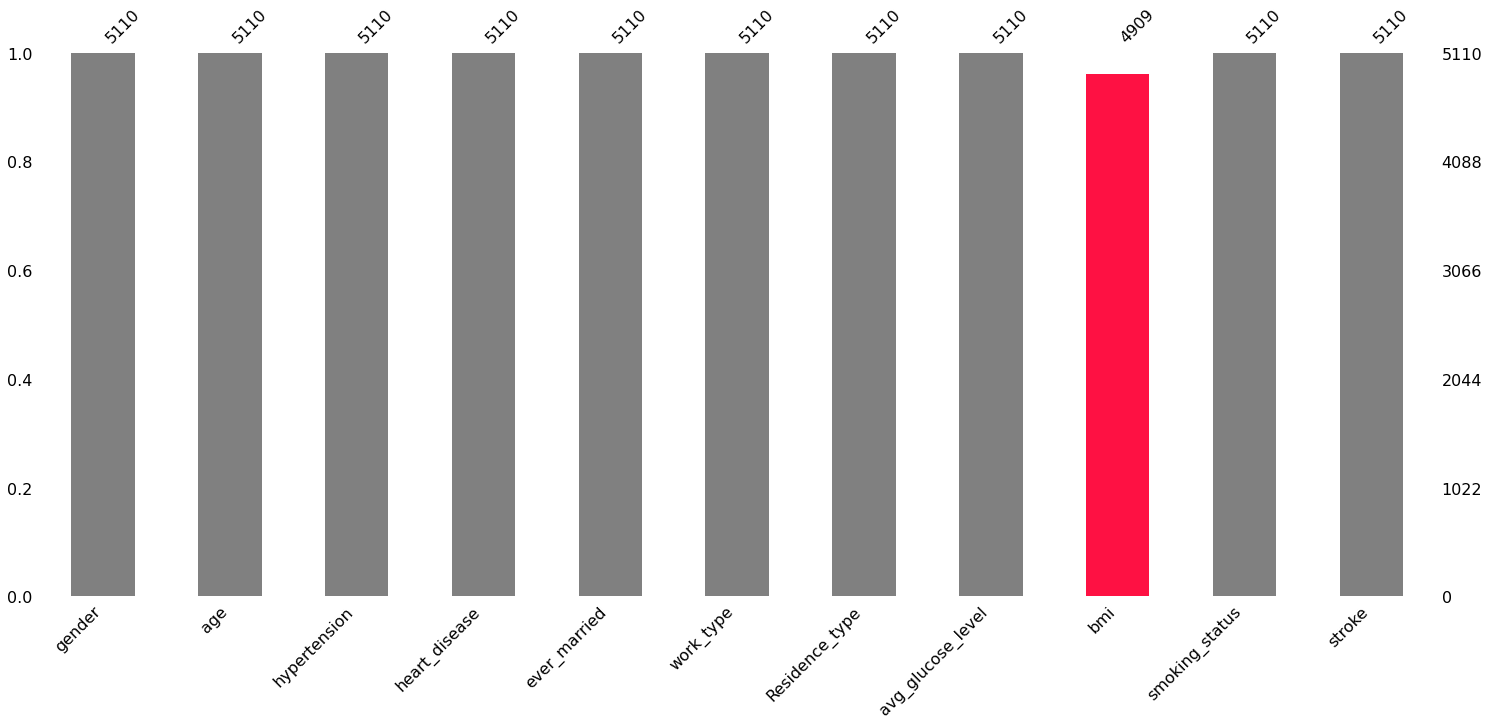

In [ ]:
# Melakukan visualisasi data yang kosong
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','#FE1143','grey','grey']
msno.bar(df, color=colors)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Terdapat 5110 data sesuai informasi awal data, namun berdasarkan visualisasi data diatas, dapat kita lihat bahwa terdapat data yang kosong pada kolom 'bmi' sehingga jumlah data tidak mencapai 5110.
</details>

In [ ]:
num_columns = ['age', 'avg_glucose_level', 'bmi']
cat_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']
# Fungsi untuk plot distribusi data numerik berkelanjutan pada suatu kolom
def num_continuous(column:str, title:str):
  figures = px.histogram(data_frame=df,
                        x=column,
                        color='stroke',
                        template='plotly_white',
                        marginal='box',
                        nbins=200,
                        color_discrete_sequence=["#FF7171","#9FD8DF"],
                        barmode='stack',
                        histfunc='count')

  figures.update_layout(font_family='Open Sans',
                        title=dict(text=title,
                                  x=0.47,
                                  font=dict(color="#333",size=20)),
                        hoverlabel=dict(bgcolor='white'))

  figures.show()

# Fungsi untuk plot distribusi data numerik biner dan kategori pada suatu kolom
def cat_distribution(column:str):
   if column == 'smoking_status':
    len_a = len(df[df[column]=="formerly smoked"])
    len_b = len(df[df[column]=="never smoked"])
    len_c = len(df[df[column]=="smokes"])
    len_d = len(df[df[column]=="Unknown"])

    stroke_a = len(df.loc[(df["stroke"]==1) & (df[column]=="formerly smoked")])
    healthy_a = len_a - stroke_a

    stroke_b = len(df.loc[(df["stroke"]==1) & (df[column]=="never smoked")])
    healthy_b = len_b - stroke_b

    stroke_c = len(df.loc[(df["stroke"]==1) & (df[column]=="smokes")])
    healthy_c = len_c - stroke_c

    stroke_d = len(df.loc[(df["stroke"]==1) & (df[column]=="Unknown")])
    healthy_d = len_d - stroke_d

    labels = ['Formerly smoked with stroke', 'Formerly smoked', 'Never smoked with stroke', 'Never smoked', 'Smokes with stroke', 'Smokes', 'Unknown with stroke', 'Unknown']
    values = [stroke_a, healthy_a, stroke_b, healthy_b, stroke_c, healthy_c, stroke_d, healthy_d]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
    fig.update_layout(
    title_text="Distribusi fitur pada kolom {}".format(column))
    fig.show()
   elif column == 'work_type':
    len_a = len(df[df[column]=="children"])
    len_b = len(df[df[column]=="Govt_job"])
    len_c = len(df[df[column]=="Never_worked"])
    len_d = len(df[df[column]=="Private"])
    len_e = len(df[df[column]=="Self-employed"])

    stroke_a = len(df.loc[(df["stroke"]==1) & (df[column]=="children")])
    healthy_a = len_a - stroke_a

    stroke_b = len(df.loc[(df["stroke"]==1) & (df[column]=="Govt_job")])
    healthy_b = len_b - stroke_b

    stroke_c = len(df.loc[(df["stroke"]==1) & (df[column]=="Never_worked")])
    healthy_c = len_c - stroke_c

    stroke_d = len(df.loc[(df["stroke"]==1) & (df[column]=="Private")])
    healthy_d = len_d - stroke_d

    stroke_e = len(df.loc[(df["stroke"]==1) & (df[column]=="Self-employed")])
    healthy_e = len_e - stroke_e

    labels = ['Children with stroke', 'Children', 'Gov job with stroke', 'Gov job', 'Never worked with stroke', 'Never worked', 
              'Private with stroke', 'Private', 'Self with stroke', 'Self']
    values = [stroke_a, healthy_a, stroke_b, healthy_b, stroke_c, healthy_c, stroke_d, healthy_d, stroke_e, healthy_e]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
    fig.update_layout(
    title_text="Distribusi fitur pada kolom {}".format(column))
    fig.show()

   else:
    if column == 'gender':
      val_a = 'Male'
      val_b = 'Female'
      argx = 'Male'
      argy = 'Female'
    elif column == 'hypertension':
      val_a = 0
      val_b = 1
      argx = "Don't have hypertension"
      argy = 'Have hypertension'
    elif column == 'heart_disease':
      val_a = 0
      val_b = 1
      argx = 'Healthy heart'
      argy = 'Unhealthy Heart'
    elif column == 'ever_married':
      val_a = 'No'
      val_b = 'Yes'
      argx = 'Unmarried'
      argy = 'Married'
    elif column == 'Residence_type':
      val_a = 'Urban'
      val_b = 'Rural'
      argx = 'Urban home'
      argy = 'Rural home'

    len_data = len(df)
    len_a = len(df[df[column]==val_a])
    len_b = len_data - len_a

    stroke_a = len(df.loc[(df["stroke"]==1) & (df[column]==val_a)])
    healthy_a = len_a - stroke_a

    stroke_b = len(df.loc[(df["stroke"]==1) & (df[column]==val_b)])
    healthy_b = len_b - stroke_b

    labels = ['{} with stroke'.format(argx), argx,'{} with stroke'.format(argy), argy]
    values = [stroke_a, healthy_a, stroke_b, healthy_b]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
    fig.update_layout(
    title_text="Distribusi fitur pada kolom {}".format(column))
    fig.show()

##### 3.3.2.1 Distribusi data pada kolom dengan fitur numerik biner dan kategori (gender, hypertension, heart_disease, ever_married, Residence_type, smoking_status, work_type)

In [ ]:
# Melakukan visualisasi data pada setiap kolom dengan fitur numerik biner dan kategori
for column in cat_columns:
  cat_distribution(column)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil visualisasi data diatas, kita dapat melihat distribusi data yang ada pada setiap kolom dimana terdapat presentase jumlah individu yang sehat dan yang menderita stroke tiap label atau nilai yang ada.

##### 3.3.2.2 Distribusi data pada kolom dengan fitur numerik berkelanjutan (age, avg_glucose_level, bmi)

In [ ]:
# Melakukan visualisasi data pada setiap kolom dengan fitur numerik berkelanjutan
for column in num_columns:
  num_continuous(column=column, title=f"Distribusi fitur numerik pada kolom {column}")

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Berdasarkan hasil visualisasi data diatas, kita dapat melihat distribusi data numerik berkelanjutan yang ada pada setiap kolom. Termasuk nilai minimum, median, maksimum, Q1, Q3, batas atas dan batas bawah. Selain itu kita juga dapat melihat beberapa nilai <i>outliers</i> atau data pencilan pada setiap kolomnya.
</details>

#### 3.3.3 Distribusi kelas pada kolom dengan fitur kategori (stroke)

In [ ]:
stroke_data = pd.DataFrame(df['stroke'].value_counts())
figures = px.pie(data_frame=stroke_data,
             values='stroke',
             names=['healthy','stroke'],
             hole=0.38,
             color_discrete_sequence=["#9FD8DF","#FF7171"],
             labels={'label':'stroke','stroke':'No. Of Samples'})

figures.update_layout(font_family='Open Sans',
                      title=dict(text='Distribusi kelas pada kolom stroke',
                                 x=0.49,
                                 y=0.98,
                                 font=dict(color="#333",size=20)),
                      hoverlabel=dict(bgcolor='white'))

figures.update_traces(textposition='outside', textinfo='percent+label')

figures.show()

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari hasil visualisasi persentasi individu yang menderita stroke dapat disimpulkan bahwa distribusi data tidak seimbang <i>unbalanced distribution</i> dan terlihat bahwa 5 dari 100 orang berisiko menderita stroke.
</details>

Text(0.5, 1.0, 'Korelasi Fitur Terhadap Stroke')

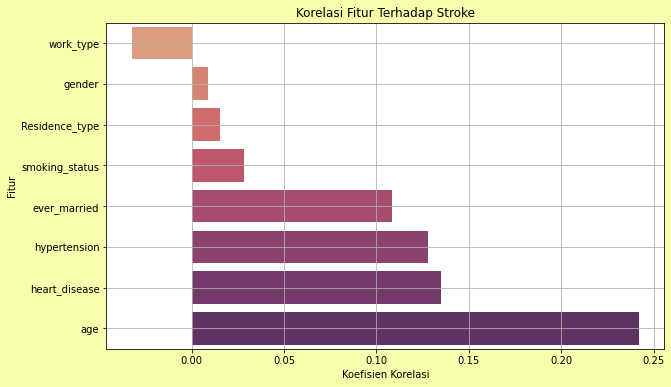

In [ ]:
# Menampilkan visualisasi korelasi fitur terhadap target(stroke)
# Melakukan proses one-hot encoding 
le = LabelEncoder()
transform_df = df.apply(le.fit_transform)
cat_columns.append('age')
corr_data = []
for cols in cat_columns:
    y = transform_df["stroke"]
    x = transform_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Fitur': cols,
        'Koefisien Korelasi' : corr,
        'Feat_type': 'numerical'
    }
    corr_data.append(dict)
df_corr = pd.DataFrame(corr_data)
fig = plt.figure(figsize=(10,6), facecolor='#F6FFAB')
ax = sns.barplot(x="Koefisien Korelasi", y="Fitur", 
                     data=df_corr.sort_values('Koefisien Korelasi'),
                     palette='flare')
ax.grid()
ax.set_title("Korelasi Fitur Terhadap Stroke")

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Berdasarkan visualisasi dari korelasi fitur terhadap stroke memnunjukan bahwa fitur umur atau <i>age</i> memiliki korelasi yang tinggi terhadap penderita stroke sedangkan fitur jenis pekerjaan atau <i>work type</i> tidak memiliki pengaruh terhadap penyakit stroke.
</details>

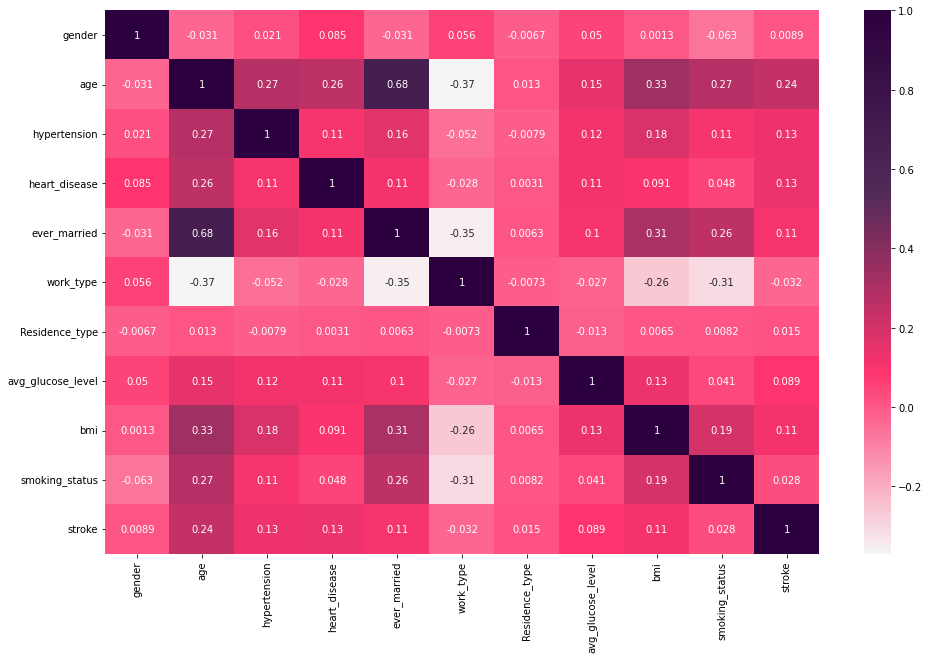

In [ ]:
# Visualisasi heatmap dari korelasi data
# semakin mendekati 1 semakin tinggi korelasi datanya
# semkain mendekati -1 semakin rendah korelasi datanya
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plt.figure(figsize=(16,10))
sns.heatmap(transform_df.corr(),cmap=colormap, annot=True);

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Apabila nilai korelasi (z) mendekati 1 maka korelasi data antar kolom termasuk tinggi dan baik untuk digunakan dalam fitur model klasifikasi. Korelasi positif yang sangat tinggi terdapat pada usia/<i>age</i> dan perkawinan/<i>ever married</i>, sementara pekerjaan/<i>work type</i> dan lainnya berkorelasi negatif dalam urutan tertinggi
</details>

# **4. Persiapan Data** ***(Data Preparation)***

## 4.1 Melakukan pembagian data fitur dan target

In [ ]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

## 4.2 Menyandikan label dan penskalaan nilai numerik

In [ ]:
# Inisialisasi fungsi OneHotEncoder dan MinMaxScaler
ohe = OneHotEncoder()
mms = MinMaxScaler()

In [ ]:
# Membedakan kolom data kategori dan numerik berkelanjutan 
category =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
num_con = ['age','bmi', 'avg_glucose_level'] 

In [ ]:
# Standarisasi nilai data pada fitur 
# numerik berkelanjutan dengan MinMaxScaler
X[num_con] = mms.fit_transform(X[num_con])

In [ ]:
# Menyandikan label fitur dengan teknik one-hot encoding
temp = X.drop(columns = category)
dummies = pd.get_dummies(X[category])
X = pd.concat([temp,dummies], axis = 1)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dengan melakukan standarisasi data, kita telah membuat semua fitur numerik berada dalam skala data yang sama karena kita akan menerapkan KNN Imputer untuk mengisi kolom yang memiliki data kosong sehingga tidak menghasilkan nilai yang bias untuk nilai yang kosong. Selain itu standarisasi juga membuat komputasi dari model dapat berjalan lebih baik karena rentang datanya hanya antara 0-1. Setelah itu melakukan teknik <i>One-Hot Encoding</i> untuk merubah setiap nilai di dalam kolom menjadi kolom baru dan mengisinya dengan nilai biner yaitu 0 dan 1.
</details>

## 4.3 Mengatasi masalah data yang kosong dengan KNN _Imputation_

In [ ]:
# Melakukan penggantian data kosong dengan penggantian berbasis jarak
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Melakukan penggantian data yang kosong dengan nilai rata-rata dari 5 tetangga terdekat sesuai parameter 'n_neighbors' yang diukur dengan jarak Euclidean.
</details>

In [ ]:
# Mengecek kembali nilai yang kosong pada dataset
X.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Dengan hasil diatas maka semua data sudah terisi dan tidak ada data yang kosong

## 4.4 Mengatasi masalah data tidak seimbang dengan teknik SMOTE

In [ ]:
# Menghitung label sebelum dilakukan oversampling
print("Label '1': {}".format(sum(y==1)))
print("Label '0': {} \n".format(sum(y==0)))

Label '1': 249
Label '0': 4861 



In [ ]:
# Inisialisasi teknik SMOTE
sm = SMOTE(random_state = 42)

In [ ]:
# Melakukan resample sehingga banyak data pada label = 1 adalah 4861 
X_res, y_res = sm.fit_resample(X, y.ravel())

In [ ]:
# Menghitung label setelah dilakukan oversampling
print('Shape of Training features: {}'.format(X_res.shape))
print('Shape of Training targets: {}'.format(y_res.shape))
print("Label '1': {}".format(sum(y_res==1)))
print("Label '0': {} \n".format(sum(y_res==0)))

Shape of Training features: (9722, 21)
Shape of Training targets: (9722,)
Label '1': 4861
Label '0': 4861 



<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
  Sebelumnya data target (stroke) memiliki data yang tidak seimbang dimana pada data dengan label 1 (stroke) lebih sedikit, maka diperlukan teknik untuk melakukan penambahan data atau <i>oversampling</i>. Disini kita menggunakan teknik SMOTE <i>(Synthetic Minority Oversampling Technique) </i> untuk menambah data agar jumlah keduanya seimbang
</details>

## 4.5 Melakukan pembagian data pada dataset dengan train_test_split

In [ ]:
# Melakukan pembagian data dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Membagi dataset menjadi 80% untuk data latih dan 20% data uji
</details>

In [ ]:
# Mengecek jumlah baris setelah dilakukan pembagian data latih dan data uji
print(X_train.shape)
print(X_test.shape)

(7777, 21)
(1945, 21)


# **5. Pembuatan Model**

## 5.1 Model Pertama dengan Algoritma Multi-Layer Perceptron

In [ ]:
# Pembuatan model pertama
model_mlp = MLPClassifier(random_state=2021)
model_mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(random_state=2021)

In [ ]:
# Pengujian model terhadap data test
y_pred_mlp = model_mlp.predict(X_test)

In [ ]:
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(mlp_report).transpose()

,precision,recall,f1-score,support
Healthy,0.918051,0.850256,0.882854,975.000000
Stroke,0.859885,0.923711,0.890656,970.000000
accuracy,0.886889,0.886889,0.886889,0.886889
macro avg,0.888968,0.886984,0.886755,1945.000000
weighted avg,0.889043,0.886889,0.886745,1945.000000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
mlp_cf = confusion_matrix(y_test, y_pred_mlp)

## 5.2 Model Kedua dengan Algoritma K-Nearest Neighbors

In [ ]:
# Pembuatan model pertama
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Pengujian model terhadap data test
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [ ]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True, target_names=['Healthy',"Stroke"])
pd.DataFrame(knn_report).transpose()

,precision,recall,f1-score,support
Healthy,0.964200,0.828718,0.891340,975.000000
Stroke,0.849142,0.969072,0.905152,970.000000
accuracy,0.898715,0.898715,0.898715,0.898715
macro avg,0.906671,0.898895,0.898246,1945.000000
weighted avg,0.906819,0.898715,0.898228,1945.000000


In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
knn_cf = confusion_matrix(y_test, y_pred_knn)

# **6. Evaluasi Model**

## 6.1 Perbandingan metriks antara model pertama dengan model yang kedua

In [ ]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [mlp_report['accuracy'], knn_report['accuracy']],
                        'precision_0' : [mlp_report['Healthy']['precision'],knn_report['Healthy']['precision']],
                        'recall_0' : [mlp_report['Healthy']['recall'],knn_report['Healthy']['recall']],
                        'f1-score_0' : [mlp_report['Healthy']['f1-score'],knn_report['Healthy']['f1-score']],
                        'precision_1' : [mlp_report['Stroke']['precision'],knn_report['Stroke']['precision']],
                        'recall_1' : [mlp_report['Stroke']['recall'],knn_report['Stroke']['recall']],
                        'f1-score_1' : [mlp_report['Stroke']['f1-score'],knn_report['Stroke']['f1-score']]},
                        index=['Model Multi-Layer Perceptron','Model K-Nearest Neighbors'])
multiheader = [('','accuracy'),
               ('Healthy', 'precision'),
               ('Healthy', 'recall'),
               ('Healthy', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall'),
               ('Stroke', 'f1-score')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Healthy  ...    Stroke          
                              accuracy precision  ...    recall  f1-score
Model Multi-Layer Perceptron  0.886889  0.918051  ...  0.923711  0.890656
Model K-Nearest Neighbors     0.898715  0.964200  ...  0.969072  0.905152

[2 rows x 7 columns]

<details>
  <summary>Buka untuk penjelasan<h4><b>Penjelasan :</b></h4></summary>
Dari kedua hasil visualisasi prediksi dengan confussion matrix diatas, kita dapat melihat bahwa performa masing-masing model sudah cukup baik, namun pada model kedua atau model yang menggunakan algoritma K-Nearest Neighbors memiliki performa yang cukup baik dibandingkan dengan model pertama yang menggunakan algoritma Multi-Layer Perceptron
</details>

## 6.2 Confussion Matrix

In [ ]:
# Membuat fungsi untuk menampilkan confusion matrix
def plot_cm(matrix, title):
  for cm in matrix:
    z = cm
    x = ['Healthy', 'Stroke']
    y = x

    z_text = [[str(y) for y in x] for x in z]

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='blugrn')

    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title))

    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.1,
                            'showarrow':False,
                            'text':"Label 2",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.20,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Label 1",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # Mengatur margin
    fig.update_layout(margin={'t':50, 'l':20},width=500,height=500)
    
    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
plot_cm([mlp_cf, knn_cf],title="model")

# Penutupan

Model untuk memprediksi orang yang beresiko terkena penyakit stroke atau tidak telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba melakukan hyper paramater tuning pada masing-masing model untuk mencari parameter yang terbaik untuk pembuatan model.


### *Referensi*
- Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html
- Dokumentasi Plotly : https://plotly.com/python/
- Lainnya :
  - https://www.kaggle.com/rachidyz/eda-and-modeling-for-predicting-stroke#feature_to_target
  - https://www.kaggle.com/bhuvanchennoju/data-storytelling-auc-focus-on-strokes/notebook
  - https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb